# W205 2020 Fall Project 1: Query Project 


## Abstract 

(USE THESE TABLES!) The static tables we will be using in this class are in the dataset san_francisco :

bikeshare_stations

bikeshare_status

bikeshare_trips

## Part 1 - Querying Data with BigQuery

### 1-1 Initial Questions

- What's the size of this dataset? (i.e., how many trips)
   * Answer:
     - There are 74 stations in the table of bikeshare_stations. In addition, all rows are distinct stations in the table. 
     - There are 107501619 status records in the table of san_francisco.bikeshare_status.
     - There are 983648 trips in record in the table of san_francisco.bikeshare_trips. In addition, all the trip IDs in record are distinct.
   * SQL query:
   
```sql 
    #standardSQL
    select count(station_id)
    from `bigquery-public-data.san_francisco.bikeshare_stations`
```  

Row | StationsSize
--- | ------------
1   | 74

    
```sql
    #standardSQL
    select count(distinct station_id) as StationsNumber
    from `bigquery-public-data.san_francisco.bikeshare_stations`
```
    
Row | StationsNumber
--- | --------------
1	| 74

```sql
    #standardSQL
    select count(*) as StatusNumber
    from `bigquery-public-data.san_francisco.bikeshare_status`
```

Row | StatusNumber
--- | --------------
1	|107501619

```sql
    #standardSQL
    select count(*) as TripsSize
    from `bigquery-public-data.san_francisco.bikeshare_trips`
```
Row | TripsSize	
--- | ---------
1	| 983648

```sql
    #standardSQL
    select count(distinct trip_id) as TripsNumber
    from `bigquery-public-data.san_francisco.bikeshare_trips`
```
Row	| TripsNumber	
--- | -----------
1	| 983648


 - What is the earliest start date and time and latest end date and time for a trip?
   * Answer: The earliset start date & time is 2013-08-29 09:08:00 UTC; the latest end date & time is 2016-08-31 23:48:00 UTC.
 
   * SQL query:

```sql
    #standardSQL
    select min(start_date) as EarlyTime
    from `bigquery-public-data.san_francisco.bikeshare_trips`
```
Row	| EarlyTime	
--- | ---------
1	| 2013-08-29 09:08:00 UTC

```sql
    #standardSQL
    select max(end_date) as LateTime
    from `bigquery-public-data.san_francisco.bikeshare_trips`
```
Row | LateTime	
--- | --------
1	| 2016-08-31 23:48:00 UTC

 - How many bikes are there?
   * Answer: Assuming all bikes have been used for trips have been recoreded, there are 700 bikes according to the distinct bike ID from the table bikeshare_trips. In addition, the maximum total availability of all  stations is fewer than 641, which is a supporting evidence.
   * SQL query:

```sql
    #standardSQL
    select count(distinct bike_number) as BikesNumber
    from `bigquery-public-data.san_francisco.bikeshare_trips`
```

Row | BikesNumber	
--- | -----------
1	| 700


```sql
    #standardSQL
    select sum (bikes_available) as total_available, time 
    from `bigquery-public-data.san_francisco.bikeshare_status`
    group by time
    order by total_available DESC LIMIT 5
```
Row | total_available | time
--- | --------------- | ----
1	| 641 | 2014-11-01 03:56:02 UTC
2	| 640 | 2014-11-01 00:33:03 UTC
3	| 640 | 2014-11-01 01:18:03 UTC
4	| 640 | 2014-11-01 06:20:02 UTC
5	| 640 | 2014-11-01 03:48:03 UTC


### 1-2 Author's own Questions 

- Question 1:: In which zip code area, there are the most share trips?

  * Answer: Zip code 94107 is the most popular for share trips. 
  * SQL query:

```sql
    #standardSQL
    select count (distinct trip_id) as trips_number, zip_code 
    from `bigquery-public-data.san_francisco.bikeshare_trips`
    group by zip_code
    order by trips_number DESC LIMIT 5
```
Row	| trips_number | zip_code	
--- | ------------ | --------
1	| 106913 | 94107
2	| 61232 | 94105
3	| 46544 | 94133
4	| 38072 | 94103
5	| 33642 | 94111



 - Question 2: Which station is the most popular as a start station, and end station. 
 
   * Answer: San Francisco Caltrain (Townsend at 4th) is the most popular as both start station and end station.
   * SQL query:

```sql
    #standardSQL
    select count (*) as trips_number, start_station_name 
    from `bigquery-public-data.san_francisco.bikeshare_trips`
    group by start_station_id, start_station_name
    order by trips_number DESC LIMIT 5
```

Row | trips_number | start_station_name	
--- | ------------ | ------------------
1 |	72683 | San Francisco Caltrain (Townsend at 4th)
2 |	56100 | San Francisco Caltrain 2 (330 Townsend)
3 | 49062 | Harry Bridges Plaza (Ferry Building)
4 | 41137 | Embarcadero at Sansome
5 | 39936 | 2nd at Townsend


```sql
    #standardSQL
    select count (*) as trips_number, end_station_name 
    from `bigquery-public-data.san_francisco.bikeshare_trips`
    group by end_station_id, end_station_name
    order by trips_number DESC LIMIT 5
```
Row	| trips_number | end_station_name
--- | ------------ | ----------------
1	| 92014      | San Francisco Caltrain (Townsend at 4th)
2	| 58713      | San Francisco Caltrain 2 (330 Townsend)
3	| 50185      | Harry Bridges Plaza (Ferry Building)
4	| 46197      | Embarcadero at Sansome
5	| 44145      | 2nd at Townsend

 - Question 3: What is the longest and shortest duration of the trip?

    * Answer: The longest trip duration is 17270400 seconds, which is over 199 days; while the shortest trip lasts 60 seconds. 
    * SQL query:

```sql
    #standardSQL
    select max (duration_sec) as max_duration_sec 
    from `bigquery-public-data.san_francisco.bikeshare_trips`
```
Row	| max_duration_sec
--- | ----------------
1	| 17270400

```sql
    #standardSQL
    select min (duration_sec) as min_duration_sec 
    from `bigquery-public-data.san_francisco.bikeshare_trips`
```
Row	| min_duration_sec
--- | ----------------
1	| 60

## Part 2 - Querying data from the BigQuery CLI



### 2-1 Queries



1. Rerun the first 3 queries from Part 1 using bq command line tool:
   
  * What's the size of this dataset? (i.e., how many trips)
    * Answer: Please refer to part 1.
    * SQL query:
  

    

In [10]:
! bq query --use_legacy_sql=false 'select count(distinct station_id) as stations_number from `bigquery-public-data.san_francisco.bikeshare_stations`' 

Waiting on bqjob_r63b6d123c5d4b877_00000174b8c4e556_1 ... (0s) Current status: DONE   
+-----------------+
| stations_number |
+-----------------+
|              74 |
+-----------------+


In [11]:
! bq query --use_legacy_sql=false 'select count (distinct trip_id) as trips_number from `bigquery-public-data.san_francisco.bikeshare_trips`'

Waiting on bqjob_r23b19363b111a48f_00000174b8c57318_1 ... (0s) Current status: DONE   
+--------------+
| trips_number |
+--------------+
|       983648 |
+--------------+


In [12]:
! bq query --use_legacy_sql=false 'select count(*) as StatusNumber from `bigquery-public-data.san_francisco.bikeshare_status`'

Waiting on bqjob_r6d813c9e01471ae6_00000174b8c5b790_1 ... (0s) Current status: DONE   
+--------------+
| StatusNumber |
+--------------+
|    107501619 |
+--------------+


  * What is the earliest start time and latest end time for a trip?
     * Answer: Please refer to part 1.
     * SQL query:
  
```
    bq query --use_legacy_sql=false '
        select min(start_date) as EarlyTime, max(end_date) as LateTime 
        from 
            `bigquery-public-data.san_francisco.bikeshare_trips`'  
```

        +---------------------+---------------------+
        |      EarlyTime      |      LateTime       |
        +---------------------+---------------------+
        | 2013-08-29 09:08:00 | 2016-08-31 23:48:00 |
        +---------------------+---------------------+



In [8]:
! bq query --use_legacy_sql=false 'select min(start_date) as EarlyTime, max(end_date) as LateTime from `bigquery-public-data.san_francisco.bikeshare_trips`'

Waiting on bqjob_r4813061ba4935c0e_00000174b8c3e56b_1 ... (0s) Current status: DONE   
+---------------------+---------------------+
|      EarlyTime      |      LateTime       |
+---------------------+---------------------+
| 2013-08-29 09:08:00 | 2016-08-31 23:48:00 |
+---------------------+---------------------+


  * How many bikes are there?
      * Answer: Please refer to part 1.
      * SQL query:
  
```
    bq query --use_legacy_sql=false '
        select count(distinct bike_number) as BikesNumber 
        from 
            `bigquery-public-data.san_francisco.bikeshare_trips`'
```
        +-------------+
        | BikesNumber |
        +-------------+
        |         700 |
        +-------------+

In [13]:
! bq query --use_legacy_sql=false 'select count(distinct bike_number) as BikesNumber from `bigquery-public-data.san_francisco.bikeshare_trips`'

Waiting on bqjob_r25c05662f561d17a_00000174b8c68572_1 ... (0s) Current status: DONE   
+-------------+
| BikesNumber |
+-------------+
|         700 |
+-------------+


2. New Query (Run using bq and paste your SQL query and answer the question in a sentence, using properly formatted markdown):

  * How many trips are in the morning vs in the afternoon?
    * Answer: There are 398273 morning trips(start and end at AM), 569438 afternoon trips(start and end at PM). While there are 14066 trips that start at AM and end at PM, 1871 trips that start at PM and end at AM.
    * SQL query:

In [2]:
! bq query --use_legacy_sql=false 'SELECT COUNT(DISTINCT TP.trip_id) as Morining_tirp FROM (SELECT trip_id, FORMAT_TIMESTAMP("%P", start_date) AS start_time, FORMAT_TIMESTAMP("%P", end_date) AS end_time, from `bigquery-public-data.san_francisco.bikeshare_trips`) AS TP where TP.start_time = "am" and TP.end_time = "am"'

Waiting on bqjob_r80051c89aadb5f5_00000174c9255248_1 ... (2s) Current status: DONE   
+---------------+
| Morining_tirp |
+---------------+
|        398273 |
+---------------+


In [3]:
! bq query --use_legacy_sql=false 'SELECT COUNT(DISTINCT TP.trip_id) as Afternoon_trip FROM (SELECT trip_id, FORMAT_TIMESTAMP("%P", start_date) AS start_time, FORMAT_TIMESTAMP("%P", end_date) AS end_time, from `bigquery-public-data.san_francisco.bikeshare_trips`) AS TP where TP.start_time = "pm" and TP.end_time = "pm"'

Waiting on bqjob_r325c478629a48602_00000174c925ed9e_1 ... (1s) Current status: DONE   
+----------------+
| Afternoon_trip |
+----------------+
|         569438 |
+----------------+


In [5]:
! bq query --use_legacy_sql=false 'SELECT COUNT(DISTINCT TP.trip_id) as Mor_Aft_trip FROM (SELECT trip_id, FORMAT_TIMESTAMP("%P", start_date) AS start_time, FORMAT_TIMESTAMP("%P", end_date) AS end_time, from `bigquery-public-data.san_francisco.bikeshare_trips`) AS TP where TP.start_time = "am" and TP.end_time = "pm"'

Waiting on bqjob_r4ece870aeeada8db_00000174c927198e_1 ... (1s) Current status: DONE   
+--------------+
| Mor_Aft_trip |
+--------------+
|        14066 |
+--------------+


In [6]:
! bq query --use_legacy_sql=false 'SELECT COUNT(DISTINCT TP.trip_id) as Aft_Mor_trip FROM (SELECT trip_id, FORMAT_TIMESTAMP("%P", start_date) AS start_time, FORMAT_TIMESTAMP("%P", end_date) AS end_time, from `bigquery-public-data.san_francisco.bikeshare_trips`) AS TP where TP.start_time = "pm" and TP.end_time = "am"'

Waiting on bqjob_r6d1b18be7a3e5f13_00000174c927a3fc_1 ... (1s) Current status: DONE   
+--------------+
| Aft_Mor_trip |
+--------------+
|         1871 |
+--------------+


### 2-2 Project Questions

Main questions need to answer to make recommendations.
  
#### Questions list

- Question 1: How is the duration time distribution of all the trips (trips in certain duration time range)?

- Question 2: What is the difference between customer and subscriber users in using habbit (average trips duration, trips number, etc)?

- Question 3: How many trips are of different start, end stations vs of same start, end stations? 

- Question 4: How many trips are there in each weekday? 

- Question 5: How many trips are there in every month?

- Question 6: What is the trend of bikes and docks availability for the most popular stations (hourly, weekly, monthly)?


#### Answers
- Question 1: How is the duration time distribution of all the trips (trips in certain duration time range)?
  * Answer: Overall, there are nearly 600 thousands trips last no longer than 10 minutes. Most trips (over 900 thousands) last no longer than 30 minutes. There is difference in trip duration distribution between customers and subscribers. Trips that are no longer than 10 minutes are dominant for subsribers, while most popular trip duration range for customer is between 10 and 30 minutes. In addition, there are considerate amount trips between 45 minutes and 2 hours for customers. Assumed that most commute tirps are contributed by subscribers, it shows that most commute trips are no longer than 45 minutes. 
  * SQL query:

In [10]:
! bq query --use_legacy_sql=false 'select case when duration_sec between 0 and 600 then "0-10min" when duration_sec between 600 and 1800 then "10-30min" when duration_sec between 1800 and 2700 then "30-45min" when duration_sec between 2700 and 3600 then "45-60min" when duration_sec between 3600 and 7200 then "1-2hr" when duration_sec between 7200 and 18000 then "2-5hr" when duration_sec between 18000 and 43200 then "5-12hr" when duration_sec between 43200 and 86400 then "12hr-24hr" when duration_sec > 86400 then "24hr+" end as duration_band, count(*) as trip_number from `bigquery-public-data.san_francisco.bikeshare_trips` group by duration_band order by trip_number DESC' 

Waiting on bqjob_r1c8e412cc175cc12_00000174cc2fb849_1 ... (0s) Current status: DONE   
+---------------+-------------+
| duration_band | trip_number |
+---------------+-------------+
| 0-10min       |      595803 |
| 10-30min      |      340508 |
| 30-45min      |       12906 |
| 1-2hr         |       11890 |
| 2-5hr         |       11112 |
| 45-60min      |        6340 |
| 5-12hr        |        3699 |
| 12hr-24hr     |        1094 |
| 24hr+         |         296 |
+---------------+-------------+


In [11]:
! bq query --use_legacy_sql=false 'select case when duration_sec between 0 and 600 then "0-10min" when duration_sec between 600 and 1800 then "10-30min" when duration_sec between 1800 and 2700 then "30-45min" when duration_sec between 2700 and 3600 then "45-60min" when duration_sec between 3600 and 7200 then "1-2hr" when duration_sec between 7200 and 18000 then "2-5hr" when duration_sec between 18000 and 43200 then "5-12hr" when duration_sec between 43200 and 86400 then "12hr-24hr" when duration_sec > 86400 then "24hr+" end as Customer_duration_band, count(*) as Customer_trip_number from `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Customer" group by Customer_duration_band order by Customer_trip_number DESC'

Waiting on bqjob_r305e076732b6edd4_00000174cc2fee72_1 ... (0s) Current status: DONE   
+------------------------+----------------------+
| Customer_duration_band | Customer_trip_number |
+------------------------+----------------------+
| 10-30min               |                66208 |
| 0-10min                |                28588 |
| 1-2hr                  |                10924 |
| 2-5hr                  |                10514 |
| 30-45min               |                10508 |
| 45-60min               |                 5683 |
| 5-12hr                 |                 3266 |
| 12hr-24hr              |                  870 |
| 24hr+                  |                  248 |
+------------------------+----------------------+


In [12]:
! bq query --use_legacy_sql=false 'select case when duration_sec between 0 and 600 then "0-10min" when duration_sec between 600 and 1800 then "10-30min" when duration_sec between 1800 and 2700 then "30-45min" when duration_sec between 2700 and 3600 then "45-60min" when duration_sec between 3600 and 7200 then "1-2hr" when duration_sec between 7200 and 18000 then "2-5hr" when duration_sec between 18000 and 43200 then "5-12hr" when duration_sec between 43200 and 86400 then "12hr-24hr" when duration_sec > 86400 then "24hr+" end as Subscriber_duration_band, count(*) as Subscriber_trip_number from `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber" group by Subscriber_duration_band order by Subscriber_trip_number DESC'

Waiting on bqjob_r17e690f133934cd3_00000174cc30283f_1 ... (0s) Current status: DONE   
+--------------------------+------------------------+
| Subscriber_duration_band | Subscriber_trip_number |
+--------------------------+------------------------+
| 0-10min                  |                 567215 |
| 10-30min                 |                 274300 |
| 30-45min                 |                   2398 |
| 1-2hr                    |                    966 |
| 45-60min                 |                    657 |
| 2-5hr                    |                    598 |
| 5-12hr                   |                    433 |
| 12hr-24hr                |                    224 |
| 24hr+                    |                     48 |
+--------------------------+------------------------+


- Question 2: What is the difference between customer and subscriber users in using habbit (average trips duration, trips number, etc)?
  * Answer: There are over 800 thousands trips contributed by subscribers, with average trip duration shorter than 10 minutes. While, there are about 136 thousands trips contributed by customers, with average trip duration above 1 hour. 
  * SQL query:

In [9]:
! bq query --use_legacy_sql=false 'SELECT COUNT(trip_id) as Customer_Trip_Number, avg(duration_sec) as Average_duration from `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Customer"'

Waiting on bqjob_r5880bb270823c6ad_00000174c3270d98_1 ... (0s) Current status: DONE   
+----------------------+-------------------+
| Customer_Trip_Number | Average_duration  |
+----------------------+-------------------+
|               136809 | 3718.785160333024 |
+----------------------+-------------------+


In [19]:
! bq query --use_legacy_sql=false 'SELECT COUNT(trip_id) as Subscriber_Trip_Number, AVG(duration_sec) as Average_duration, from `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber"'

Waiting on bqjob_r49a34bcd25ed03ab_00000174c3383b7d_1 ... (0s) Current status: DONE   
+------------------------+-------------------+
| Subscriber_Trip_Number | Average_duration  |
+------------------------+-------------------+
|                 846839 | 582.7642397197222 |
+------------------------+-------------------+


- Question 3: How many trips are of different start, end stations Vs thoes of same start, end stations? 
  * Answer: Over 951 thousands trips(96%) are of different start and end stations and only 32 thousands tirps are of same start and end stations. In addition, average duration of trips that start and end at the same station is over 1.6 hour, which means these trips are more likely to be viewing trips instead of commuter trips. 
  * SQL query:


In [26]:
! bq query --use_legacy_sql=false 'SELECT COUNT(trip_id) as Same_start_end_stations, avg(duration_sec) as Average_duration from `bigquery-public-data.san_francisco.bikeshare_trips` where start_station_id = end_station_id'

Waiting on bqjob_r41afb4448867412c_00000174c3483b07_1 ... (0s) Current status: DONE   
+-------------------------+--------------------+
| Same_start_end_stations |  Average_duration  |
+-------------------------+--------------------+
|                   32047 | 5941.4904047180235 |
+-------------------------+--------------------+


In [22]:
! bq query --use_legacy_sql=false 'SELECT COUNT(trip_id) as Different_start_end_stations, avg(duration_sec) as Average_duration from `bigquery-public-data.san_francisco.bikeshare_trips` where start_station_id != end_station_id'

Waiting on bqjob_r1ff31150966e4a0d_00000174c34164e5_1 ... (0s) Current status: DONE   
+------------------------------+-------------------+
| Different_start_end_stations | Average_duration  |
+------------------------------+-------------------+
|                       951601 | 853.1557049645941 |
+------------------------------+-------------------+


- Question 4: How many trips are there in each weekday? 
  * Answer: According to question 1 most commute trips are no longer than 45 minutes, trips that no longer than 45 minutes are investigated here. In addition, there are only trips that start and end on different days among above trips. So trips that are longer than 45 minutes and start and end on the same day are investigated here. Overall, most such trips are made during weekdays with over 100 thousands shortage per day during weekend. When it come to subsriber users, such difference between weekdays and weekends is more obvious. On the other hand, most trips from customer users are on Saturday. To sum up, trips made by subscribers on weekdays are more likely to be commuting trips. 
  * SQL query:

In [13]:
! bq query --use_legacy_sql=false 'select count(*) as cross_day_trip from (SELECT trip_id, FORMAT_TIMESTAMP("%a", start_date) AS start_day, FORMAT_TIMESTAMP("%a", end_date) AS end_day, from `bigquery-public-data.san_francisco.bikeshare_trips` where duration_sec < 2700) where start_day != end_day'

Waiting on bqjob_r7771244935aa29d_00000174cc33e37f_1 ... (2s) Current status: DONE   
+----------------+
| cross_day_trip |
+----------------+
|            721 |
+----------------+


In [14]:
! bq query --use_legacy_sql=false 'select count(trip_id) as Same_day_trip_num, start_day from (SELECT trip_id, FORMAT_TIMESTAMP("%a", start_date) AS start_day, FORMAT_TIMESTAMP("%a", end_date) AS end_day, from `bigquery-public-data.san_francisco.bikeshare_trips` where duration_sec < 2700) where start_day = end_day group by start_day order by Same_day_trip_num DESC'

Waiting on bqjob_r3eb6cf5ceda36145_00000174cc3418c2_1 ... (2s) Current status: DONE   
+-------------------+-----------+
| Same_day_trip_num | start_day |
+-------------------+-----------+
|            180969 | Tue       |
|            177196 | Wed       |
|            173067 | Thu       |
|            166140 | Mon       |
|            155008 | Fri       |
|             52289 | Sat       |
|             43821 | Sun       |
+-------------------+-----------+


In [15]:
! bq query --use_legacy_sql=false 'select count(trip_id) as Customer_same_day_trip_num, start_day from (SELECT trip_id, FORMAT_TIMESTAMP("%a", start_date) AS start_day, FORMAT_TIMESTAMP("%a", end_date) AS end_day, from `bigquery-public-data.san_francisco.bikeshare_trips` where duration_sec < 2700 and subscriber_type = "Customer") where start_day = end_day group by start_day order by Customer_same_day_trip_num DESC'

Waiting on bqjob_r65862efc2c5c02b_00000174cc344d16_1 ... (0s) Current status: DONE   
+----------------------------+-----------+
| Customer_same_day_trip_num | start_day |
+----------------------------+-----------+
|                      21504 | Sat       |
|                      18546 | Sun       |
|                      15563 | Fri       |
|                      13347 | Thu       |
|                      12275 | Wed       |
|                      11909 | Tue       |
|                      11882 | Mon       |
+----------------------------+-----------+


In [16]:
! bq query --use_legacy_sql=false 'select count(trip_id) as Subscriber_same_day_trip_num, start_day from (SELECT trip_id, FORMAT_TIMESTAMP("%a", start_date) AS start_day, FORMAT_TIMESTAMP("%a", end_date) AS end_day, from `bigquery-public-data.san_francisco.bikeshare_trips` where duration_sec < 2700 and subscriber_type = "Subscriber") where start_day = end_day group by start_day order by Subscriber_same_day_trip_num DESC'

Waiting on bqjob_r5527c51cd783a8b3_00000174cc3472c1_1 ... (2s) Current status: DONE   
+------------------------------+-----------+
| Subscriber_same_day_trip_num | start_day |
+------------------------------+-----------+
|                       169060 | Tue       |
|                       164921 | Wed       |
|                       159720 | Thu       |
|                       154258 | Mon       |
|                       139445 | Fri       |
|                        30785 | Sat       |
|                        25275 | Sun       |
+------------------------------+-----------+


- Question 5. How many trips are there in every month?
  * Answer: For customers, there are more trips in September, August and October. While there are much fewer trips happened from November to February. For subscribers, trips distribution is more uniform between months. At the same time, this difference between customers and subsribers is more outstanding when only considering trips no longer than 45 minutes. 
  * SQL query:

In [23]:
! bq query --use_legacy_sql=false 'select count(trip_id) as Customer_trip_num, month from (SELECT trip_id, FORMAT_TIMESTAMP("%m", start_date) as month from `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Customer") group by month order by Customer_trip_num DESC'

Waiting on bqjob_r77c2bb3aa7a3c89d_00000174cc424ee0_1 ... (0s) Current status: DONE   
+-------------------+-------+
| Customer_trip_num | month |
+-------------------+-------+
|             17310 | 09    |
|             15543 | 08    |
|             14038 | 10    |
|             13152 | 07    |
|             12741 | 05    |
|             12147 | 06    |
|             10158 | 03    |
|              9978 | 04    |
|              9371 | 11    |
|              7862 | 02    |
|              7713 | 01    |
|              6796 | 12    |
+-------------------+-------+


In [24]:
! bq query --use_legacy_sql=false 'select count(trip_id) as Subscriber_trip_num, month from (SELECT trip_id, FORMAT_TIMESTAMP("%m", start_date) as month from `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber") group by month order by Subscriber_trip_num DESC'

Waiting on bqjob_r352344d18551a002_00000174cc44cf08_1 ... (1s) Current status: DONE   
+---------------------+-------+
| Subscriber_trip_num | month |
+---------------------+-------+
|               80340 | 10    |
|               80033 | 08    |
|               79525 | 06    |
|               76387 | 07    |
|               74218 | 04    |
|               73623 | 05    |
|               71619 | 03    |
|               70011 | 09    |
|               64075 | 01    |
|               63720 | 11    |
|               62123 | 02    |
|               51165 | 12    |
+---------------------+-------+


In [21]:
! bq query --use_legacy_sql=false 'select count(trip_id) as Subscriber_trip_45min, month from (SELECT trip_id, FORMAT_TIMESTAMP("%m", start_date) as month from `bigquery-public-data.san_francisco.bikeshare_trips` where duration_sec < 2700 and subscriber_type = "Subscriber") group by month order by Subscriber_trip_45min DESC'

Waiting on bqjob_r1ec49467650053ae_00000174cc40d3d0_1 ... (0s) Current status: DONE   
+-----------------------+-------+
| Subscriber_trip_45min | month |
+-----------------------+-------+
|                 80047 | 10    |
|                 79838 | 08    |
|                 79269 | 06    |
|                 76173 | 07    |
|                 73977 | 04    |
|                 73436 | 05    |
|                 71347 | 03    |
|                 69706 | 09    |
|                 63845 | 01    |
|                 63484 | 11    |
|                 61914 | 02    |
|                 50877 | 12    |
+-----------------------+-------+


In [22]:
! bq query --use_legacy_sql=false 'select count(trip_id) as Customer_trip_45min, month from (SELECT trip_id, FORMAT_TIMESTAMP("%m", start_date) as month from `bigquery-public-data.san_francisco.bikeshare_trips` where duration_sec < 2700 and subscriber_type = "Customer") group by month order by Customer_trip_45min DESC'

Waiting on bqjob_r2d95b148f276cc64_00000174cc4157f0_1 ... (0s) Current status: DONE   
+---------------------+-------+
| Customer_trip_45min | month |
+---------------------+-------+
|               13672 | 09    |
|               12134 | 08    |
|               10873 | 10    |
|                9888 | 07    |
|                9763 | 05    |
|                9311 | 06    |
|                7651 | 03    |
|                7651 | 04    |
|                7170 | 11    |
|                6012 | 02    |
|                5918 | 01    |
|                5255 | 12    |
+---------------------+-------+


## Part 3 - Employ notebooks to synthesize query project results

In [35]:
# Module & Package  - Run here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%matplotlib inline
plt.style.use('default')

### 3-1 Commuter trips

#### Definination 

- Trips that satisfy following requirements are of higher probability that to be commuter trips

  * Subscriber type of the trip is subscriber.
 
  * Duration of trip is no longer than 45 minutes (starts and ends on the same day).
 
  * Start and end stations of trip are different. 
 
  * Trips happen on weekdays (further investigation is required if considering working shift on the weekends)
 

#### Table of commuter trips

- Trips that satisfy conditions that last no longer than 45 minutes, used by subscribers, happened on weekdays and start and end at different stations are saved in the csv file data/commuter_trips.csv, which is realized by the command line as below.

In [56]:
!bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'select duration_sec, month, day, time, start_station_name, start_station_id, end_station_name, end_station_id from (SELECT duration_sec, FORMAT_TIMESTAMP("%m", start_date) as month, FORMAT_TIMESTAMP("%a", start_date) as day, FORMAT_TIMESTAMP("%H", start_date) as time, start_station_name, start_station_id, end_station_name, end_station_id,  FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber" and duration_sec < 2700 and FORMAT_TIMESTAMP("%a", start_date) = FORMAT_TIMESTAMP("%a", end_date) and start_station_id != end_station_id) where day != "Sun" and day != "Sat"'> data/commuter_trips.csv

Waiting on bqjob_r446bc57c47c41782_00000174ccbe78d3_1 ... (5s) Current status: DONE   


- Preview of the table stored in commuter_trips.csv are shown as below:

In [4]:
commuter_trips = pd.read_csv("data/commuter_trips.csv")
commuter_trips.head()

,duration_sec,month,day,time,start_station_name,start_station_id,end_station_name,end_station_id
0,587,10,Mon,16,Sequoia Hospital,21,Mezes,83
1,1113,12,Fri,13,San Mateo County Center,23,Mezes,83
2,301,12,Fri,17,Redwood City Caltrain Station,22,Mezes,83
3,206,9,Wed,9,Redwood City Caltrain Station,22,Mezes,83
4,325,10,Tue,17,Redwood City Caltrain Station,22,Mezes,83


#### The 5 Most popular commuter trips

 - Determination of peak hours
 
   Histogram of hourly bike share trips number based on commuter_trips.csv is shown as below. It shows that the most busy peak hours for bike share is 7-9 and 16-18, which is in consistency with typical shift schedule.  
   

Text(0.5, 1.0, 'Hourly Bike Share tirps number distribution in San Fransisco')

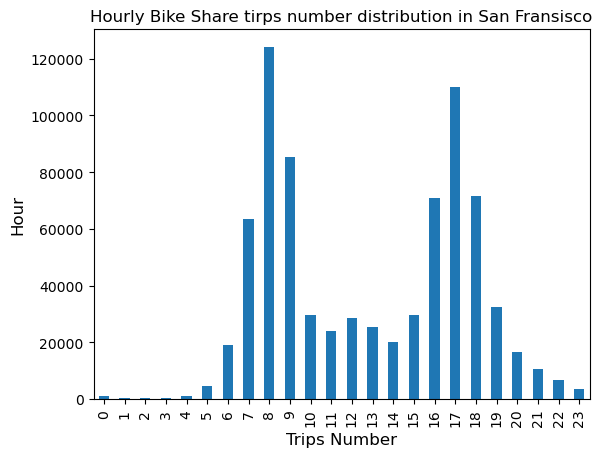

In [72]:
commuter_trips.groupby('time').size().plot(kind='bar')

plt.ylabel("Hour", size = 12)
plt.xlabel("Trips Number", size = 12)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize = 10)

plt.title("Hourly Bike Share tirps number distribution in San Fransisco", fontsize = 12)

 - The most popular routines
 
   Assumed that the routine of commuter trip is determined by its start and end stations. According to commuter trips number during the peak hours, **the 5 most popular** routines are listed as below. 

In [31]:
popular_commuter = commuter_trips.loc[commuter_trips['time'].isin([7,8,9,16,17,18])] 
popular_commuter.groupby(['start_station_name','end_station_name']).size().sort_values(ascending = False).head(5)

start_station_name                       end_station_name                        
2nd at Townsend                          Harry Bridges Plaza (Ferry Building)        5032
Harry Bridges Plaza (Ferry Building)     2nd at Townsend                             4970
San Francisco Caltrain 2 (330 Townsend)  Townsend at 7th                             4948
Embarcadero at Sansome                   Steuart at Market                           4685
Embarcadero at Folsom                    San Francisco Caltrain (Townsend at 4th)    4683
dtype: int64

### 3-2 Recommendations